In [46]:
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns

### Import and Describe Data

In [5]:
df = pd.read_stata(r'C:\Users\katel\Desktop\ML 484\data\RCT_Martinezetal.dta')

In [6]:
df.head()

,folio2011,anho,TT,C,T1,T2,T3,ind_c2010,ind_c2011,ind_c2013,...,T1_independiente,T1_dependiente,T2_independiente,T2_dependiente,log_ht,log_ventas,log_ganancias,log_gananciasbueno,log_gananciasmalo,log_gananciasprom
0,1025,2011,T2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,2.197225,3.834297,3.834297,NaN,NaN,NaN
1,1025,2013,T2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,3.931826,4.683425,3.834297,5.190545,4.502951,4.968792
2,1026,2011,T1,0.0,1.0,0.0,1.0,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1026,2013,T1,0.0,1.0,0.0,1.0,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1027,2011,T1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [7]:
df.shape

(3896, 192)

In [8]:
df=df.query('anho == 2011')
df.shape

(1948, 192)

In [24]:
df = df[['T1','T2','T3','sexo2010','edad2010','basica2010','trabaja_base','dependiente_base','indep_indep']]
df.head()

,T1,T2,T3,sexo2010,edad2010,basica2010,trabaja_base,dependiente_base,indep_indep
0,0.0,1.0,1.0,mujer,59.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,mujer,59.0,1.0,0.0,0.0,NaN
4,1.0,0.0,1.0,mujer,52.0,1.0,0.0,0.0,0.0
6,0.0,1.0,1.0,hombre,47.0,0.0,1.0,0.0,1.0
8,0.0,0.0,0.0,mujer,41.0,1.0,0.0,0.0,0.0


In [10]:
df.dtypes

T1                   float32
T2                   float32
T3                   float32
sexo2010            category
edad2010             float32
basica2010           float32
trabaja_base         float32
dependiente_base     float32
indep_indep          float32
dtype: object

In [55]:
df['sex'] = pd.factorize(df.sexo2010)[0]

In [28]:
df.describe()

,T1,T2,T3,edad2010,basica2010,trabaja_base,dependiente_base,indep_indep,sex
count,1948.000000,1948.000000,1948.000000,1839.000000,1836.000000,1829.000000,1829.000000,1389.000000,1948.000000
mean,0.353696,0.355749,0.709446,35.923328,0.315359,0.655549,0.177146,0.339093,0.010780
std,0.478235,0.478863,0.454134,10.895293,0.464787,0.475323,0.381900,0.473574,0.350195
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,43.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
print("Dimensions of data",df.shape)
print(df.isna().sum())

Dimensions of data (1948, 10)
T1                    0
T2                    0
T3                    0
sexo2010            109
edad2010            109
basica2010          112
trabaja_base        119
dependiente_base    119
indep_indep         559
sex                   0
dtype: int64


Treatment is like 3x the size of the control?

In [30]:
treat = df.query('T3==1')
print("Dimensions of treatment matrix:",treat.shape)
print(treat.isna().sum())

Dimensions of treatment matrix: (1382, 10)
T1                    0
T2                    0
T3                    0
sexo2010             75
edad2010             75
basica2010           78
trabaja_base         80
dependiente_base     80
indep_indep         387
sex                   0
dtype: int64


In [31]:
control = df.query('T3==0')
print("Dimensions of control matrix:", control.shape)
print(control.isna().sum())

Dimensions of control matrix: (566, 10)
T1                    0
T2                    0
T3                    0
sexo2010             34
edad2010             34
basica2010           34
trabaja_base         39
dependiente_base     39
indep_indep         172
sex                   0
dtype: int64


## Performing T-test

We take a look at the data to better understand our underlying parameters for t-tests.  Because most data is binomial in this data set, we will perform proportion tests for all variables of interest (except edad2010) comparing treatment and control groups. For edad2010 we perform a simple t test.

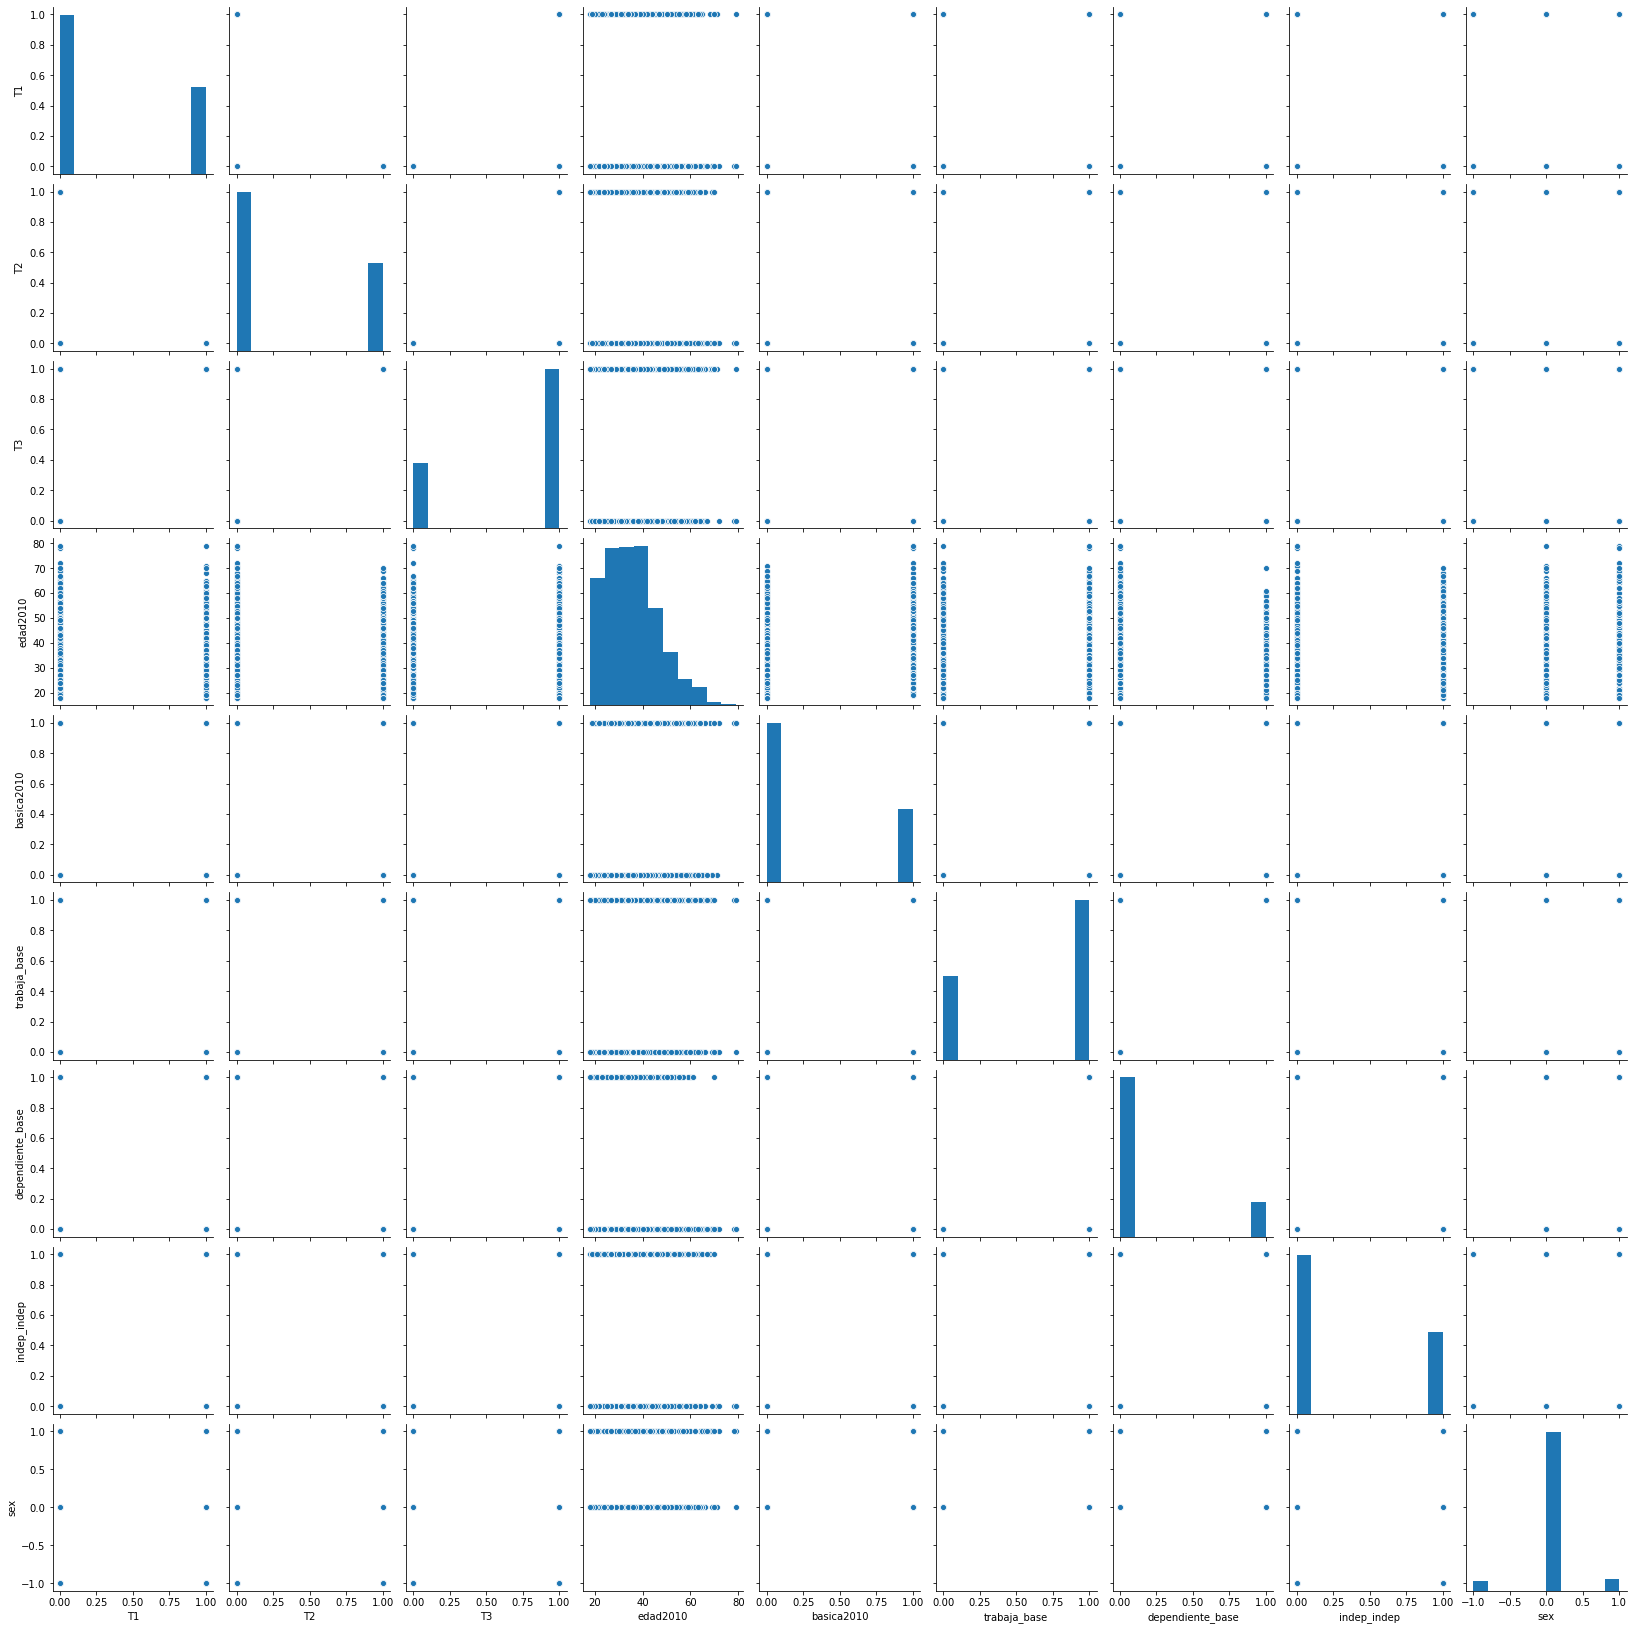

In [32]:
sns.pairplot(df)

In [41]:
cols=['basica2010', 'trabaja_base','dependiente_base', 'sex']
results = []
for i in cols:
    results.append(sm.stats.ttest_ind(treat[i].dropna(), control[i].dropna())) #Just drop na?
results
    

[(0.6386874384237765, 0.5231060353558704, 1834.0),
 (0.3773210937217209, 0.7059788220942236, 1827.0),
 (0.8592081764793471, 0.39033839023789485, 1827.0),
 (0.2994190169983882, 0.7646523286188076, 1946.0)]

In [37]:
sm.stats.ztest(treat["edad2010"].dropna(), control["edad2010"].dropna(),alternative='two-sided') #this isn't a normal dist?

(0.633394397825513, 0.5264761224652128)

### Regress employment on treatment for both periods

In [49]:
reg = sm.ols(formula="df['indep_indep'] ~ df['T3']", data=df).fit()

In [50]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      df['indep_indep']   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.69
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           2.11e-06
Time:                        09:59:03   Log-Likelihood:                -920.93
No. Observations:                1389   AIC:                             1846.
Df Residuals:                    1387   BIC:                             1856.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2437      0.024     10.292      0.0

In [52]:
treat['indep_indep'].sum()

375.0